# 神經網路計算(一)
參考: Deep Learning, 齋藤康毅，OREILLY

## Activation functions
### Sigmoid函數

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
x=1

In [4]:
y=sigmoid(x)
print(y)

0.7310585786300049


In [5]:
x=np.array([-1.0, 1.0, 2.0])

In [6]:
y=sigmoid(x)
print(y)

[0.26894142 0.73105858 0.88079708]


In [7]:
import matplotlib.pylab as plt

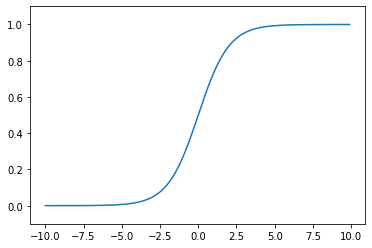

In [8]:
X = np.arange(-10.0, 10.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU函數

In [9]:
def relu(x):
    return np.maximum(0, x)

In [10]:
x=1

In [11]:
y=relu(x)
print(y)

1


In [12]:
x=np.array([-1.0, 1.0, 2.0])

In [13]:
y=relu(x)
print(y)

[0. 1. 2.]


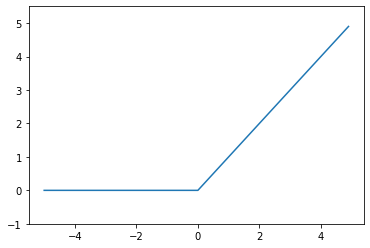

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### Softmax函數
* https://zh.wikipedia.org/wiki/Softmax函數
* https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d

In [15]:
def softmax(x):
    c=np.max(x)
    x = x - c
    return np.exp(x) / np.sum(np.exp(x))

In [16]:
x=np.array([1000, 1001,999,1002])

In [17]:
np.max(x)

1002

In [18]:
x-np.max(x)

array([-2, -1, -3,  0])

In [19]:
x=x-np.max(x)
np.exp(x)

array([0.13533528, 0.36787944, 0.04978707, 1.        ])

In [20]:
np.sum(np.exp(x))

1.553001792775919

In [21]:
y=softmax(x)
print(y)

[0.08714432 0.23688282 0.0320586  0.64391426]


In [22]:
np.sum(y)

1.0

## 單層神經網路的計算
* 單層神經網路就是除了輸入層神經元外，還有一層神經元，這一層也就是輸出層
* 輸入層神經元的個數，依輸入資料的屬性(或特徵值)個數決定
* 若是分類問題，輸出層神經元的個數，由資料的類別個數決定；若是迴歸問題，輸出層神經元只會有一個。

#### 輸入層

In [23]:
X=np.array([1, 2])
X.shape

(2,)

In [24]:
W=np.array([[1, 3, 5], [2, 4, 6]])
W.shape

(2, 3)

In [25]:
print(W)

[[1 3 5]
 [2 4 6]]


In [26]:
B=np.array([4, 8, 2])

In [27]:
A=np.dot(X, W)+B
print(A)

[ 9 19 19]


#### 輸出層

In [28]:
Y=sigmoid(A)
print(Y)

[0.99987661 0.99999999 0.99999999]


In [29]:
Y=relu(A)
print(Y)

[ 9 19 19]


In [30]:
Y=softmax(A)
print(Y)

[2.26994496e-05 4.99988650e-01 4.99988650e-01]


## 三層神經網路的計算
* 三層神經網路就是除了輸入層神經元外，另有三層神經元，包括最後的輸出層
* 輸入層神經元的個數，依輸入資料的屬性(或特徵值)個數決定
* 若是分類問題，輸出層神經元的個數，由資料的類別個數決定；若是迴歸問題，輸出層神經元只會有一個。

#### 輸入層

In [31]:
X=np.array([1.0, 0.5])

#### 第一層

In [32]:
W1=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1=np.array([0.1, 0.2, 0.3])

In [33]:
print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [34]:
A1=np.dot(X, W1)+B1
print(A1)

[0.3 0.7 1.1]


In [35]:
Z1=sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


#### 第二層

In [36]:
W2=np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2=np.array([0.1, 0.2])

In [37]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [38]:
A2=np.dot(Z1, W2)+B2
print(A2)

[0.51615984 1.21402696]


In [39]:
Z2=relu(A2)
print(Z2)

[0.51615984 1.21402696]


#### 第三層(輸出層)

In [40]:
W3=np.array([[0.1, 0.3], [0.2, 0.4]])
B3=np.array([0.1, 0.2])

In [41]:
print(Z2.shape)
print(W3.shape)
print(B3.shape)

(2,)
(2, 2)
(2,)


In [42]:
A3=np.dot(Z2, W3)+B3
print(A3)

[0.39442138 0.84045873]


In [43]:
y=softmax(A3)
print(y)

[0.39030333 0.60969667]


## Loss fnctions
### Cross entropy error (交叉熵誤差)

In [44]:
def cross_entropy_error(y, t):
    return -np.sum(t * np.log(y + 1e-7))

In [45]:
t=[1, 0]

In [46]:
np.log(y + 1e-7)

array([-0.94083081, -0.49479355])

In [49]:
t*np.log(y + 1e-7)

array([-0.94083081, -0.        ])

In [50]:
-np.sum(t * np.log(y + 1e-7))

0.9408308128473432

In [51]:
cross_entropy_error(y, t)

0.9408308128473432